# keras neural network example on mnist dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)
print(x_test.shape, x_test.dtype)
print(y_test.shape, y_test.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


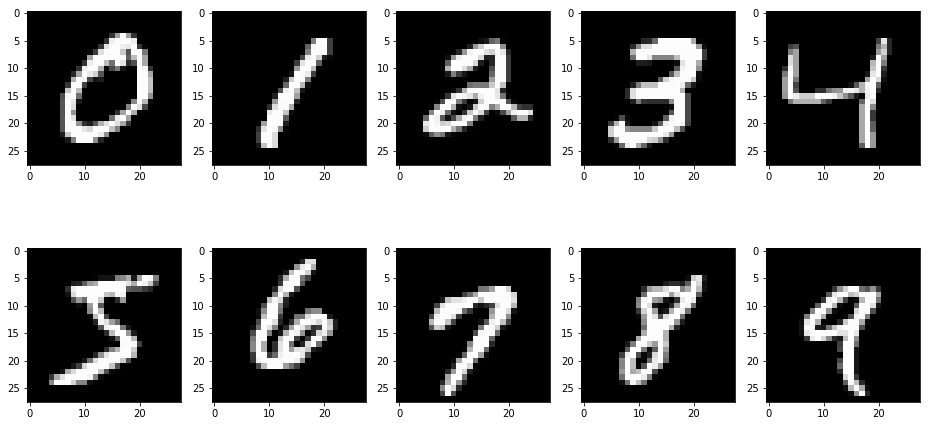

In [4]:
fig = plt.figure(figsize=(16,8))
for i in range(10):
    image = x_train[y_train==i][0]
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(image, cmap='gray')

In [5]:
# reduce train size for time saving
idx = np.random.choice(60000, size=6000, replace=False)
x_train = x_train[idx]
y_train = y_train[idx]

idx = np.random.choice(10000, size=1000, replace=False)
x_test = x_test[idx]
y_test = y_test[idx]

print(x_train.shape)
print(x_test.shape)

(6000, 28, 28)
(1000, 28, 28)


In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # rescale to 0-1
x_test /= 255
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [7]:
y_train = keras.utils.to_categorical(y_train, 10) # one hot encoding
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential() # simple neural network
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706.0
Trainable params: 669,706.0
Non-trainable params: 0.0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 4800 samples, validate on 1200 samples
Epoch 1/10
4800/4800 [==============================] - 3s - loss: 0.6045 - acc: 0.8131 - val_loss: 0.2898 - val_acc: 0.9158

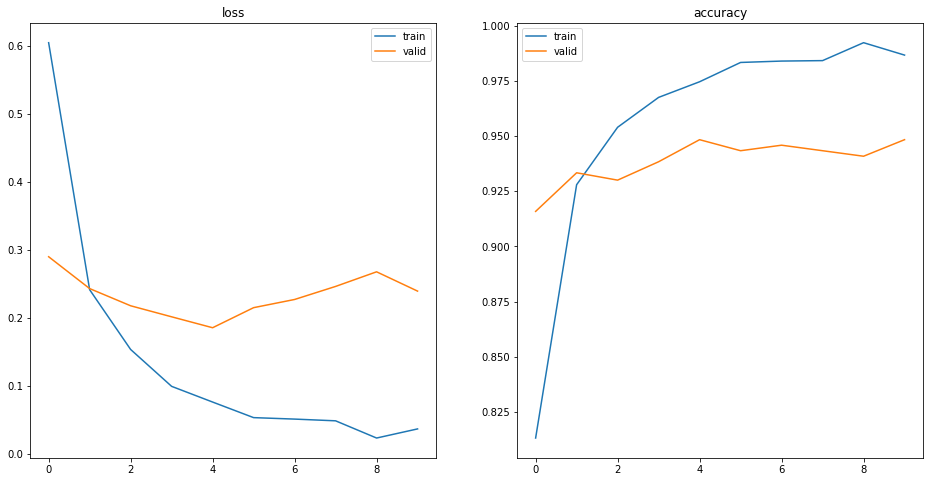

In [10]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='valid')
ax2.plot(history.history['acc'], label='train')
ax2.plot(history.history['val_acc'], label='valid')
ax1.legend()
ax1.set_title('loss')
ax2.legend()
ax2.set_title('accuracy')

In [11]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', scores[0])
print('test accuracy:', scores[1])

test loss: 0.229336574769
test accuracy: 0.943
